In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [57]:
#Stocks in the portfolio: AAPL 26.75%, MSFT 21.4%, AMZN 17.82%, GOOGL 15.3%, TSLA 13.38%
shares = {'AAPL':14,'MSFT':5,'AMZN':11,'GOOGL':10,'TSLA':7}

stocks = ['AAPL','MSFT','AMZN','GOOGL','TSLA']
closing_prices = {}

for stock in stocks:
    price = yf.Ticker(stock)
    closing_prices[stock] = round(price.history().tail(1)['Close'].iloc[0], 2)

In [58]:
closing_prices

{'AAPL': 184.4, 'MSFT': 397.58, 'AMZN': 155.2, 'GOOGL': 140.1, 'TSLA': 187.29}

In [59]:
#Portfolio Values
p_stock_values = {}

for stock in stocks:
    p_stock_values[stock] = round(closing_prices[stock] * shares[stock],2)

p_stock_values

{'AAPL': 2581.6,
 'MSFT': 1987.9,
 'AMZN': 1707.2,
 'GOOGL': 1401.0,
 'TSLA': 1311.03}

In [60]:
stock_values = p_stock_values.values()
total_p_value = sum(stock_values)
total_p_value

8988.73

In [61]:
#Portfolio weights
p_stock_weights = {}

for stock in stocks:
    p_stock_weights[stock] = round(p_stock_values[stock] / total_p_value,2)

p_stock_weights

{'AAPL': 0.29, 'MSFT': 0.22, 'AMZN': 0.19, 'GOOGL': 0.16, 'TSLA': 0.15}

In [62]:
sum(p_stock_weights.values())

1.01

In [63]:
# Volatility (180-day volatility at time)
vol_AAPL = 0.2044
vol_MSFT = 0.1869
vol_AMZN = 0.2956
vol_GOOGL = 0.2544
vol_TSLA = 0.4840

vol = {'AAPL':0.2044,'MSFT':0.1869,'AMZN':0.2956,'GOOGL':0.2544,'TSLA':0.4840}

portfolio_volatility = np.sqrt(sum((vol[stock]**2) * (p_stock_weights[stock]**2) for stock in p_stock_weights))
portfolio_volatility

0.12363779604958995

In [64]:
#Simulation
simulations = 50000
#time horizon
t_horizon = 152/252
#risk-free rate
rfr = 0.052

In [65]:
#returns on portfolio function
def VaR(pv,rfr,vol,t,simulations):
    end_value = pv * np.exp((rfr - 0.5 * vol ** 2)*t + np.random.standard_normal(
        simulations) * vol *np.sqrt(t))
    returns = end_value - pv
    return returns

In [66]:
portfolio_returns = VaR(total_p_value,rfr,portfolio_volatility,t_horizon,simulations)
portfolio_returns

array([1322.09136119,  229.6942721 ,  472.47687375, ...,  336.83941249,
        576.90327298,  351.08653458])

Current value = $8,989
Var at 90% confidence level: $-833 a loss of -9%
Var at 95% confidence level: $-1,116 a loss of -12%
Var at 99% confidence level: $-1,617 a loss of -18%


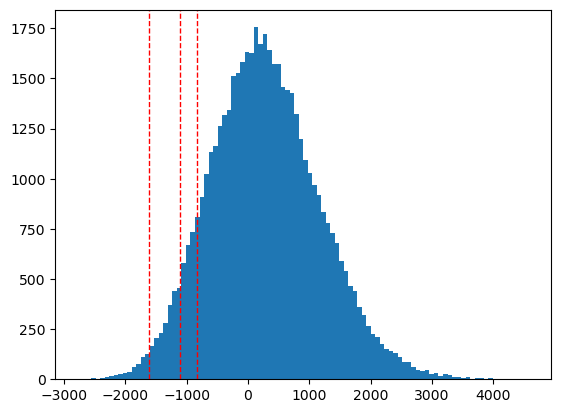

In [67]:
plt.hist(portfolio_returns, bins = 100);
print('Current value = ${:,.0f}'.format(total_p_value))
# Show VaR at 90%, 95%, and 99% confidence level
percentiles = [10,5,1]

for i in percentiles:
    confidence = (100-i)/100
    value = np.percentile(portfolio_returns,i)
    loss = value/total_p_value
    print("Var at {:.0%} confidence level: ${:,.0f} a loss of {:.0%}".format(confidence,value,loss))
    plt.axvline(value,color = 'red', linestyle='dashed',linewidth=1)